# 1. Introduction
I use the Instacart Online Grocery Shopping dataset to understand how customers purchase and reorder products, based on millions of real transactions. By examining patterns such as what items are bought together and how often shoppers return, I can identify meaningful trends that support better product recommendations and marketing strategies. These insights help retailers personalize the shopping experience and improve decision-making across inventory, pricing, and promotions.



Import libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read Data

In [5]:
# Read data

aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
products = pd.read_csv("products.csv")
orders = pd.read_csv("orders.csv")
order_products_prior = pd.read_csv("order_products_prior.csv")


In [6]:
orders.shape

(3421083, 7)

## READ the details of the Orders

In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## READ the details of the Orders prior

In [8]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


# 2. Data EDA and Preprocessing

## We Can Merge using the Order_Id in both tables

In [9]:
All_orders = pd.merge(orders,
         order_products_prior,
         left_on='order_id',
         right_on='order_id',
         how='inner')

In [10]:
All_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0


# 3. Merge products and dept.
## To get which product belongs to which category

In [11]:
products_dept = products.merge(
    departments,
    on="department_id",
    how="left"
).drop(columns='department_id')

In [12]:
products_dept

,product_id,product_name,aisle_id,department
0,1,Chocolate Sandwich Cookies,61,snacks
1,2,All-Seasons Salt,104,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen
4,5,Green Chile Anytime Sauce,5,pantry
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,frozen
49685,49686,Artisan Baguette,112,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,pets


## 3.1 Understanding count of products in every department

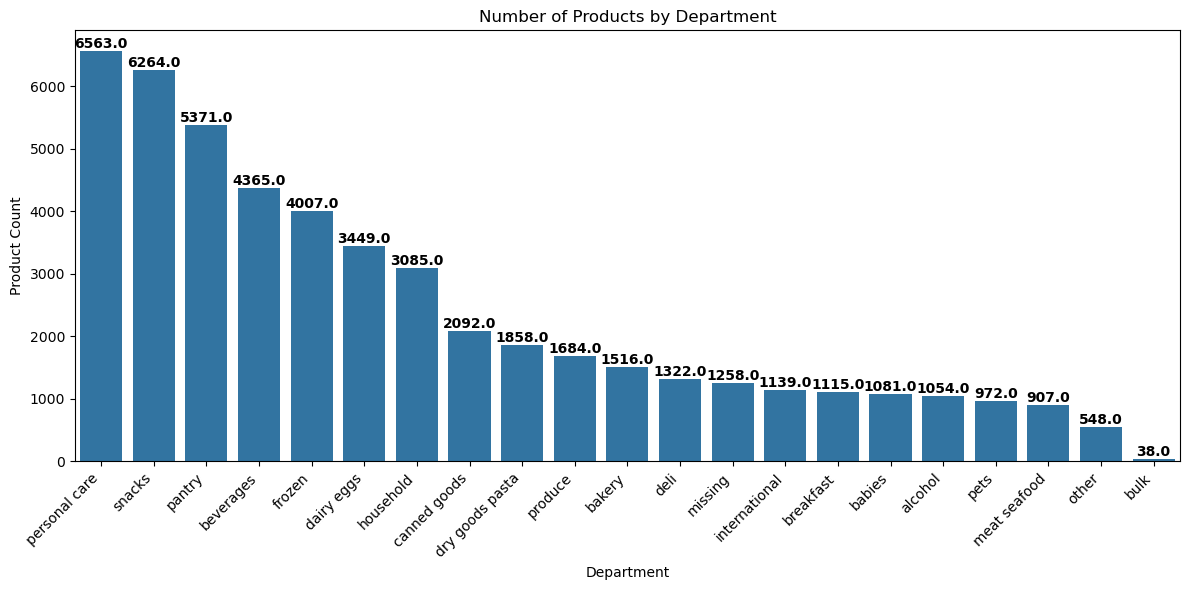

In [13]:
plt.figure(figsize=(12,6))

# Use correct column name: department_name
ax = sns.countplot(
    data=products_dept,
    x="department",
    order=products_dept["department"].value_counts().index
)

plt.title("Number of Products by Department")
plt.xlabel("Department")
plt.ylabel("Product Count")

# Rotate labels for readability
plt.xticks(rotation=45, ha="right")


# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()

4. Business Questions that we answered




### 4.1. What are the top 10 most frequently purchased products?

In [14]:
top_products = (order_products_prior
    .groupby('product_id')    # Group BY ProducID
    .size()
    .reset_index(name='purchase_count')
    .merge(products[['product_id','product_name']], on='product_id')
    .sort_values('purchase_count', ascending=False)
    .head(10))


C:\Users\seand\AppData\Local\Temp\ipykernel_25280\62297143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


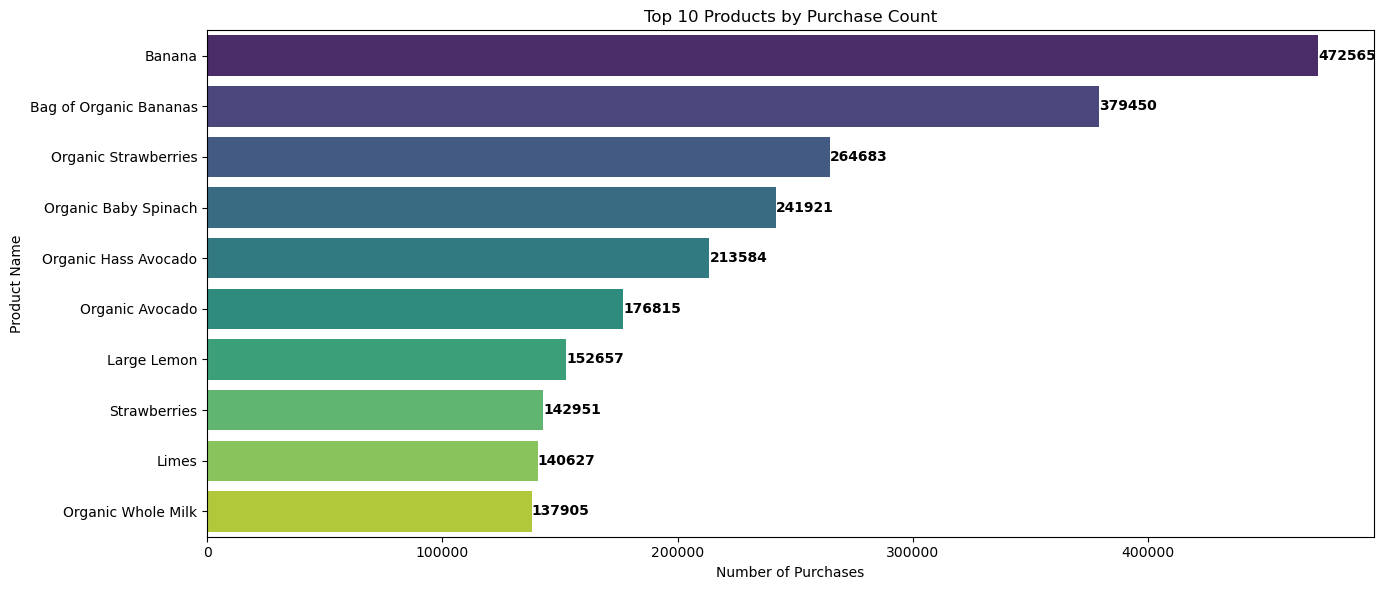

In [15]:
# Plotting the top 10 products
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=top_products,
    x='purchase_count',
    y='product_name',
    palette='viridis'
)

# Add count annotations
for p in ax.patches:
    height = p.get_width()
    ax.annotate(
        f"{int(height)}",
        (height, p.get_y() + p.get_height() / 2),
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Top 10 Products by Purchase Count')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

Insight 4.1: Bananas are being sold the most!
Focus more on selling bananas, dealing in large quantities can cut down costs and improve profits. Delete the non-performing categories to improve bottom-line ebitda.

### 4.2. Which aisles have the highest product demand?

In [16]:
aisle_demand = (order_products_prior
    .merge(products[['product_id','aisle_id']], on='product_id')
    .merge(aisles, on='aisle_id')
    .groupby('aisle')
    .size()
    .reset_index(name='total_orders')
    .sort_values('total_orders', ascending=False)
    .head(10))

C:\Users\seand\AppData\Local\Temp\ipykernel_25280\1777365211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


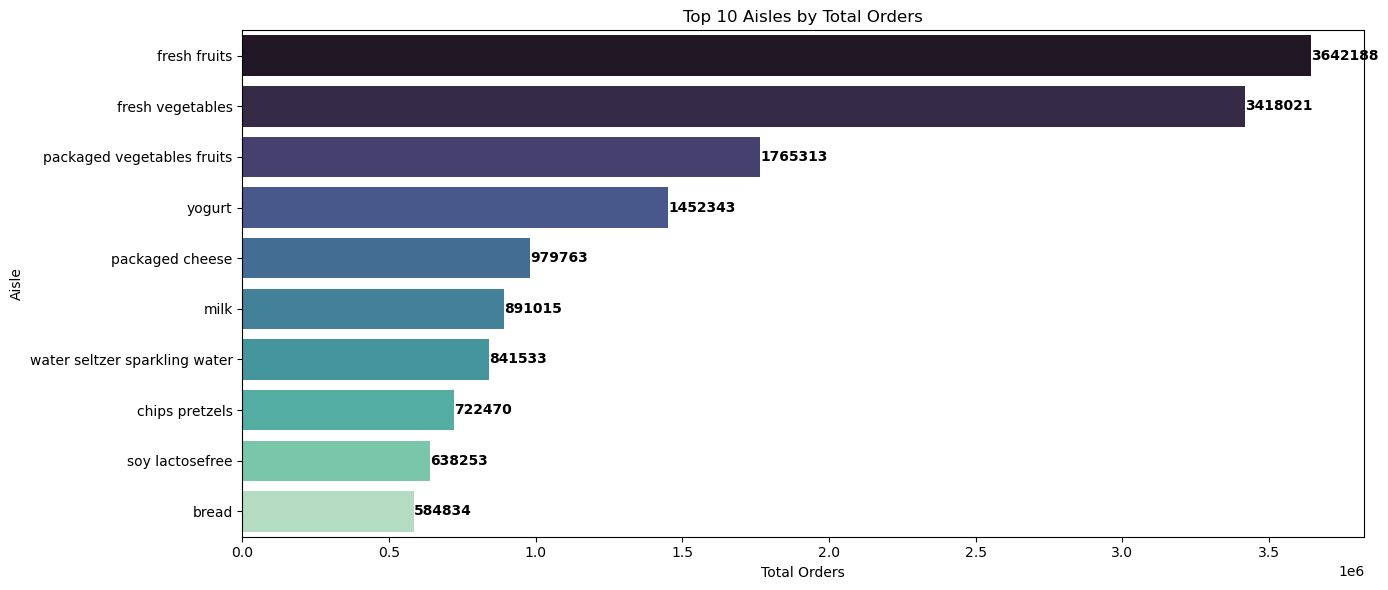

In [17]:
# Assuming aisle_demand DataFrame is already created as per your query

plt.figure(figsize=(14, 6))

# Create horizontal barplot ordered by total_orders descending
ax = sns.barplot(
    data=aisle_demand,
    y='aisle',
    x='total_orders',
    palette='mako'
)

# Add count labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f"{int(width)}",
        (width, p.get_y() + p.get_height() / 2),
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Top 10 Aisles by Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Aisle')

plt.tight_layout()
plt.show()

####Insights 4.2: Fresh fruits aisle has the highest product demands. This makes sense as bananas belong fresh fruits category.

### 4.3. What are the reorder rates for each product?

In [18]:
# Calculate reorder rates and total purchases for all products
reorder_rates_all = (order_products_prior
    .groupby('product_id')['reordered']
    .agg(reorder_rate='mean', total_purchases='size') # Calculate mean reorder rate and total purchases
    .reset_index())

# Merge with product names
reorder_rates_all = reorder_rates_all.merge(products[['product_id','product_name']], on='product_id')

# Filter for products with a minimum number of total purchases to ensure meaningful rates
min_purchases_threshold = 50 # You can adjust this threshold based on data distribution
reorder_rates_filtered = reorder_rates_all[reorder_rates_all['total_purchases'] >= min_purchases_threshold]

# Get the top 10 products by reorder rate from the filtered set
reorder_rates = reorder_rates_filtered.sort_values('reorder_rate', ascending=False).head(10)

C:\Users\seand\AppData\Local\Temp\ipykernel_25280\1462959591.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


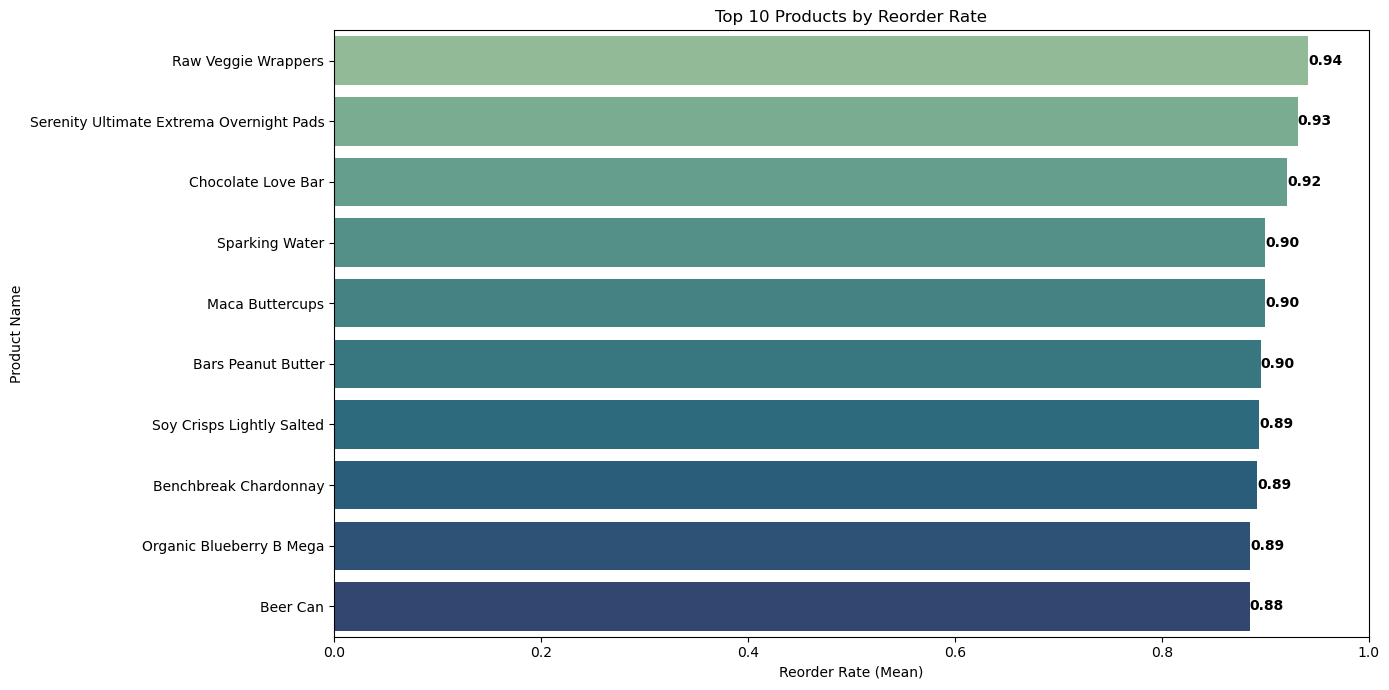

In [19]:
# Assuming reorder_rates dataframe with 'product_name' and 'reorder_rate' columns

plt.figure(figsize=(14, 7))

# Sort products by reorder_rate descending for bar order
order = reorder_rates.sort_values('reorder_rate', ascending=False)['product_name']

ax = sns.barplot(
    data=reorder_rates,
    x='reorder_rate',
    y='product_name',
    order=order,
    palette='crest'
)

# Add reorder rate labels on each bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f"{width:.2f}",
        (width, p.get_y() + p.get_height() / 2),
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Top 10 Products by Reorder Rate')
plt.xlabel('Reorder Rate (Mean)')
plt.ylabel('Product Name')

plt.xlim(0, 1.0)  # Reorder rate is a fraction between 0 and 1

plt.tight_layout()
plt.show()

Insights 4.3: Most people reorder purified water, followed by whole milk and omega 3 milk.

### 4.4. Which departments generate the most orders?


In [20]:
dept_demand = (order_products_prior
    .merge(products[['product_id','department_id']], on='product_id')
    .merge(departments, on='department_id')
    .groupby('department')
    .size()
    .reset_index(name='total_orders')
    .sort_values('total_orders', ascending=False)
    .head(10))

C:\Users\seand\AppData\Local\Temp\ipykernel_25280\2593881403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


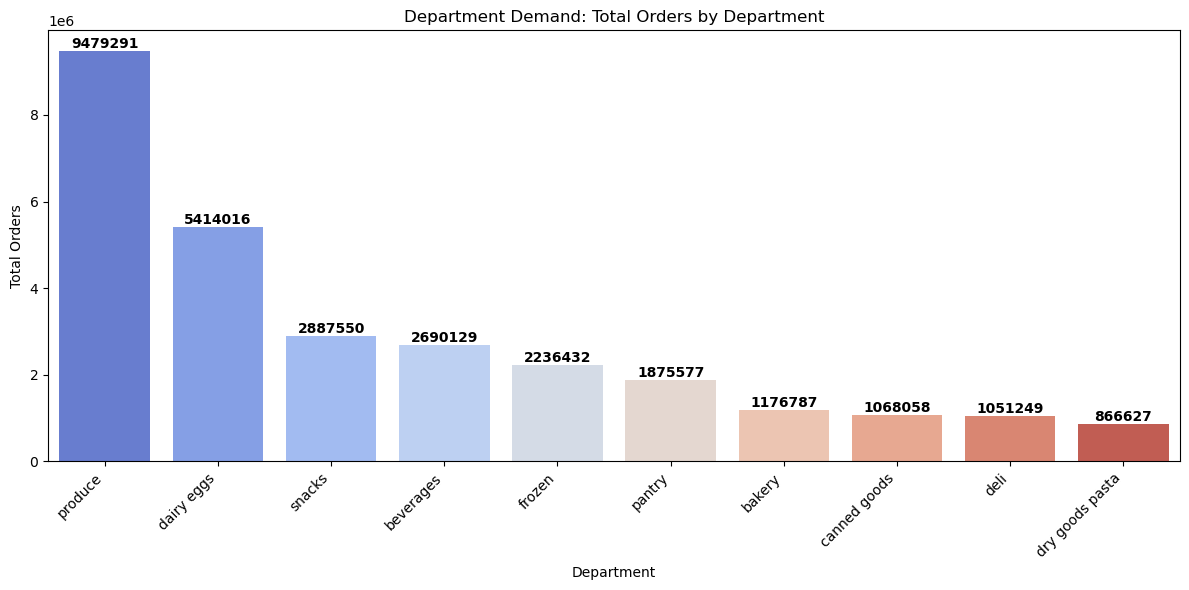

In [21]:
plt.figure(figsize=(12, 6))

# Sort departments by total_orders descending and pass order for the plot
order = dept_demand.sort_values('total_orders', ascending=False)['department']

ax = sns.barplot(
    data=dept_demand,
    x='department',
    y='total_orders',
    order=order,
    palette='coolwarm'
)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Department Demand: Total Orders by Department')
plt.xlabel('Department')
plt.ylabel('Total Orders')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


####Insights 4.4: Produce is the most order generating department.

##4.5. What time of day do customers place the most orders?

In [22]:
order_time = (orders
    .groupby('order_hour_of_day')
    .size()
    .reset_index(name='order_count')
    .sort_values('order_count', ascending=False))


C:\Users\seand\AppData\Local\Temp\ipykernel_25280\2016210720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


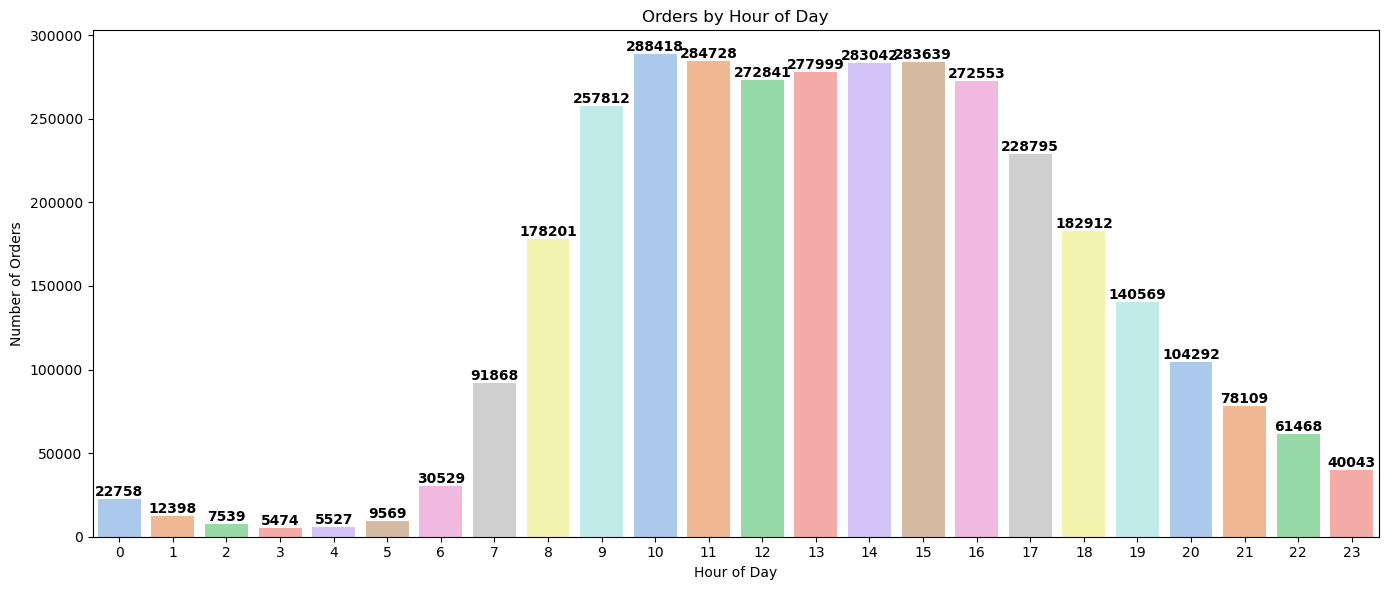

In [23]:
plt.figure(figsize=(14, 6))

ax = sns.barplot(
    data=order_time,
    x='order_hour_of_day',
    y='order_count',
    palette='pastel'
)

# Add count labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{int(height)}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')

plt.xticks(range(0, 24))  # Show all 24 hours on x-axis
plt.tight_layout()
plt.show()

Insights 4.5: Almost 90% of the orders were placed during 8am to 8pm window on an average throughout the day.

4.6. What day of the week has the most orders?

In [24]:
dow_demand = (orders
    .groupby('order_dow')
    .size()
    .reset_index(name='order_count')
    .sort_values('order_count', ascending=False))

C:\Users\seand\AppData\Local\Temp\ipykernel_25280\2706489511.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


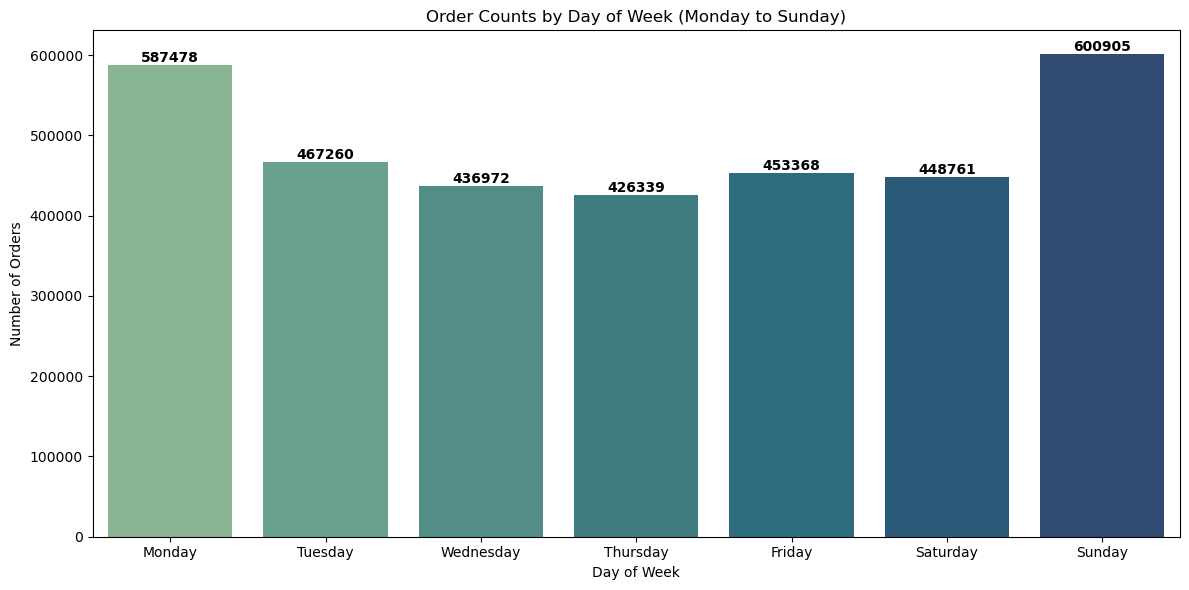

In [25]:
# Map numeric day codes to weekday names
# Assuming original order_dow: 0=Sunday, 1=Monday, ... 6=Saturday
dow_labels = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create a categorical type with Monday first through Sunday last
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Map numeric order_dow to weekday names using a dictionary
dow_demand['weekday'] = dow_demand['order_dow'].map(dict(enumerate(dow_labels)))

# Convert the new 'weekday' column to a pandas Categorical type with a specified order
dow_demand['weekday'] = pd.Categorical(dow_demand['weekday'], categories=dow_order, ordered=True)

# Sort the DataFrame by the categorical 'weekday' column according to the provided order
dow_demand = dow_demand.sort_values('weekday')

# Plot the data with seaborn barplot using the ordered weekdays on the x-axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=dow_demand,
    x='weekday',
    y='order_count',
    palette='crest'
)

# Add numeric labels above each bar for clarity
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Label the plot clearly
plt.title('Order Counts by Day of Week (Monday to Sunday)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


Insights 4.6: Most people go for shopping on Sunday and Monday concluding that weekends are usually busy.

4.7. What is the average time between customer orders?

In [26]:
avg_days = orders.groupby('user_id')['days_since_prior_order'].mean().reset_index(name='avg_days_between_orders')
average_time_between_orders = avg_days['avg_days_between_orders'].mean()
print(f"The average time between customer orders is {average_time_between_orders:.2f} days.")

The average time between customer orders is 15.45 days.


Insights 4.7: The average time between customer orders is 15.45 days.

4.8. What are the most common first items placed in the cart?

In [27]:
first_items = (order_products_prior[order_products_prior['add_to_cart_order'] == 1]
    .merge(products[['product_id','product_name']], on='product_id')
    .groupby('product_name')
    .size()
    .reset_index(name='first_item_count')
    .sort_values('first_item_count', ascending=False)
    .head(10))

C:\Users\seand\AppData\Local\Temp\ipykernel_25280\478774447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


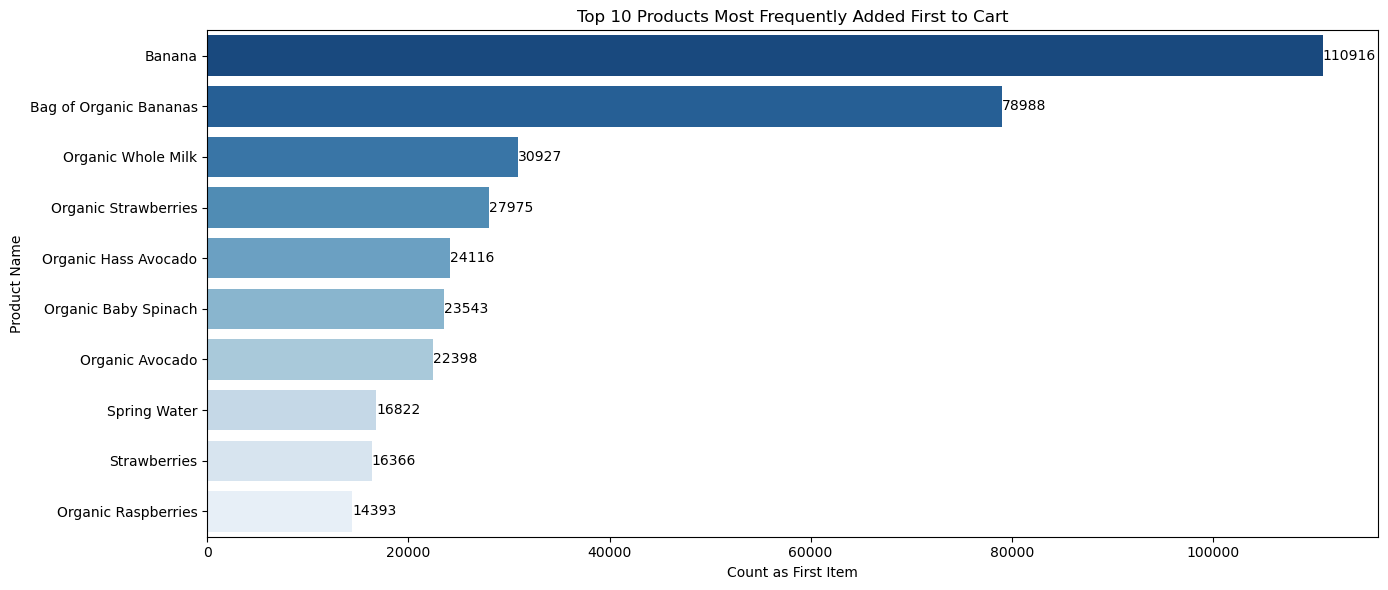

In [28]:
plt.figure(figsize=(14, 6))

ax = sns.barplot(
    data=first_items,
    x='first_item_count',
    y='product_name',
    palette='Blues_r'
)

plt.title('Top 10 Products Most Frequently Added First to Cart')
plt.xlabel('Count as First Item')
plt.ylabel('Product Name')

# Annotate counts on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height() / 2),
        ha='left',
        va='center'
    )

plt.tight_layout()
plt.show()


Insights 4.8: Bananas are the first placed products in most carts. Followed by milk, strawberries and avocado.

4.9. Which products have the highest average cart position?

In [29]:
cart_position = (order_products_prior
    .groupby('product_id')['add_to_cart_order']
    .mean()
    .reset_index(name='avg_cart_position')
    .merge(products[['product_id','product_name']], on='product_id')
    .sort_values('avg_cart_position', ascending=False)
    .head(10))

C:\Users\seand\AppData\Local\Temp\ipykernel_25280\3056474373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


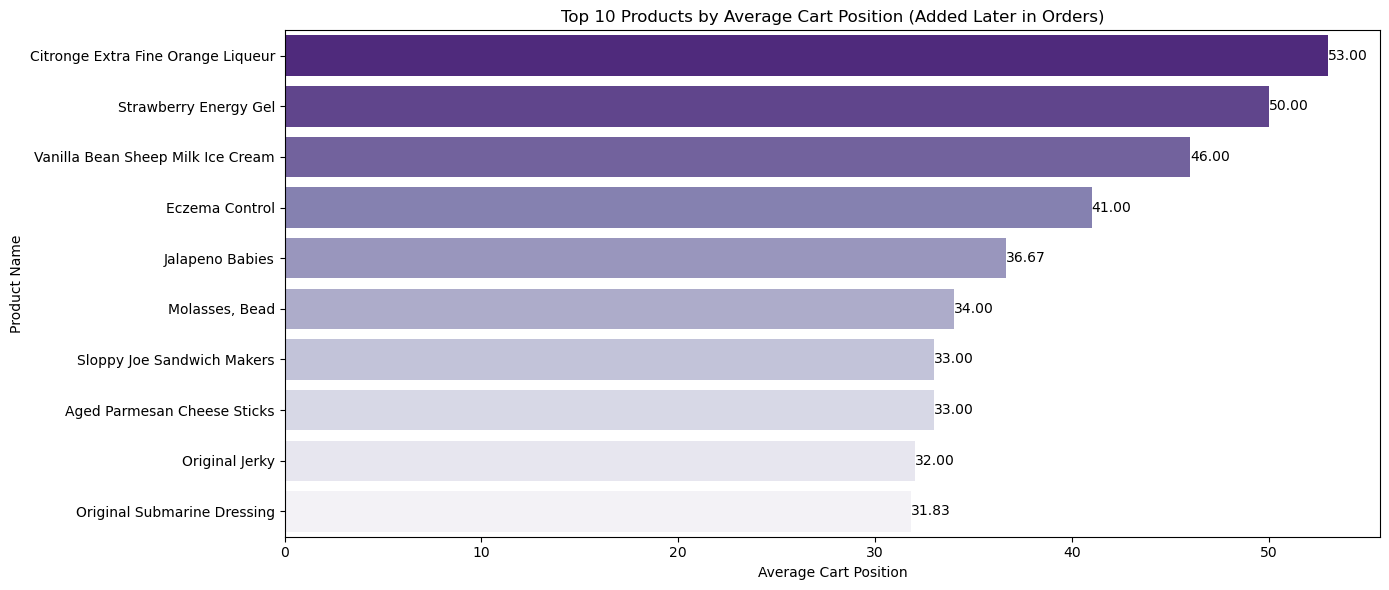

In [30]:
plt.figure(figsize=(14, 6))

ax = sns.barplot(
    data=cart_position,
    x='avg_cart_position',
    y='product_name',
    palette='Purples_r'
)

plt.title('Top 10 Products by Average Cart Position (Added Later in Orders)')
plt.xlabel('Average Cart Position')
plt.ylabel('Product Name')

# Add numeric labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f"{width:.2f}",
        (width, p.get_y() + p.get_height() / 2),
        ha='left',
        va='center'
    )

plt.tight_layout()
plt.show()


Insights 4.9: Highest placed products in cart are Orange Liqeur

4.10. Which department–aisle combinations are purchased the most?

In [31]:
dept_aisle_combo = (order_products_prior
    .merge(products[['product_id','aisle_id','department_id']], on='product_id')
    .merge(aisles, on='aisle_id')
    .merge(departments, on='department_id')
    .groupby(['department','aisle'])
    .size()
    .reset_index(name='order_count')
    .sort_values('order_count', ascending=False)
    .head(10))

In [32]:

# Now, compute the department-aisle combination as originally intended
dept_aisle_combo = (order_products_prior
    .merge(products[['product_id','aisle_id','department_id']], on='product_id')
    .merge(aisles, on='aisle_id')
    .merge(departments, on='department_id')
    .groupby(['department','aisle'])
    .size()
    .reset_index(name='order_count')
    .sort_values('order_count', ascending=False)
    .head(10))

C:\Users\seand\AppData\Local\Temp\ipykernel_25280\1686027509.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


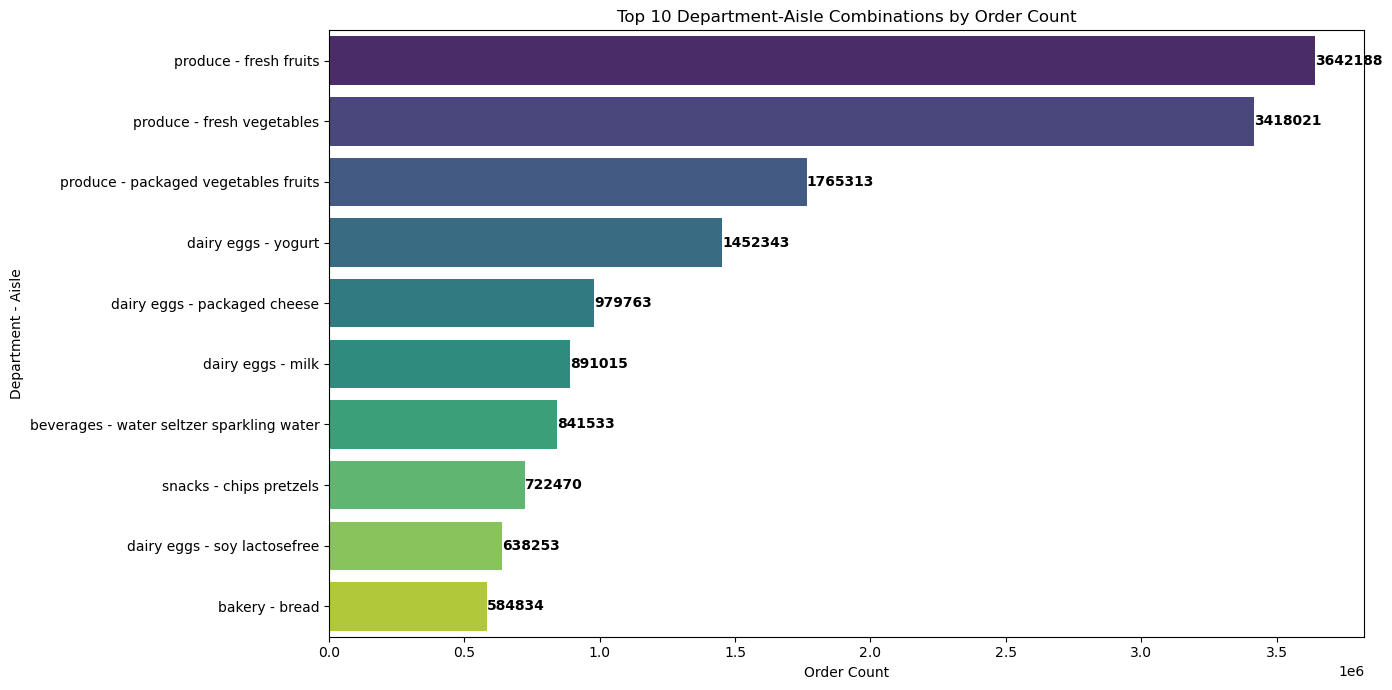

In [33]:
plt.figure(figsize=(14, 7))

# Combine department and aisle as one label for better visualization
dept_aisle_combo['dept_aisle'] = dept_aisle_combo['department'] + ' - ' + dept_aisle_combo['aisle']

# Horizontal barplot ordered by order_count
ax = sns.barplot(
    data=dept_aisle_combo,
    y='dept_aisle',
    x='order_count',
    palette='viridis'
)

plt.title('Top 10 Department-Aisle Combinations by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Department - Aisle')

# Annotate bars with counts
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f"{int(width)}",
        (width, p.get_y() + p.get_height() / 2),
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


Insights 4.10: Produce, fresh fruits. Followed by produce - fresh vegetables and packaged vegetables fruits are the highest purchased combinations.

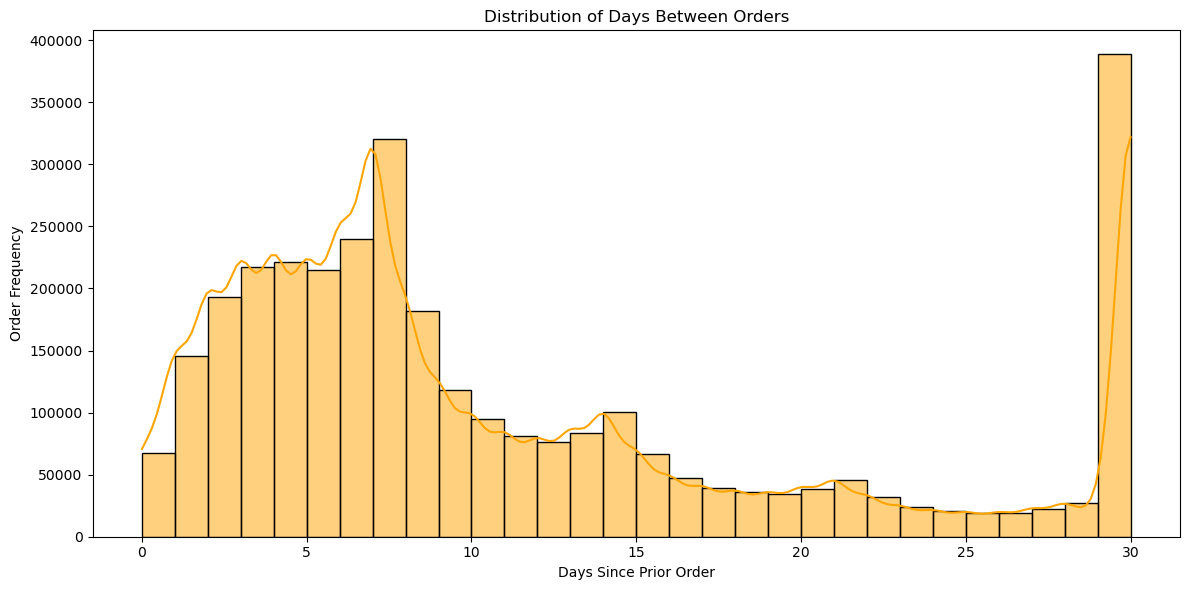

In [34]:


plt.figure(figsize=(12,6))
sns.histplot(orders['days_since_prior_order'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Days Between Orders')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Order Frequency')
plt.tight_layout()
plt.show()


4.11. Calculating the audience segments based on R,F,M calculations.

In [35]:
max_overall_order_number = orders['order_number'].max()
print(f"Maximum overall order number: {max_overall_order_number}")

Maximum overall order number: 100


In [36]:
user_max_order = orders.groupby('user_id')['order_number'].max().reset_index(name='max_user_order_number')
print(user_max_order.head())

   user_id  max_user_order_number
0        1                     11
1        2                     15
2        3                     13
3        4                      6
4        5                      5


In [37]:
All_orders = pd.merge(orders,
         order_products_prior,
         left_on='order_id',
         right_on='order_id',
         how='inner')

rfm = user_max_order.copy()

# Calculate Frequency: number of orders per user
user_frequency = orders.groupby('user_id').size().reset_index(name='frequency')
rfm = rfm.merge(user_frequency, on='user_id', how='left')

# Calculate Monetary: total number of products purchased by each user (as a proxy for monetary value)
user_monetary = All_orders.groupby('user_id').size().reset_index(name='monetary')
rfm = rfm.merge(user_monetary, on='user_id', how='left')

print(rfm.head())

   user_id  max_user_order_number  frequency  monetary
0        1                     11         11        59
1        2                     15         15       195
2        3                     13         13        88
3        4                      6          6        18
4        5                      5          5        37


In [38]:
rfm['recency'] = max_overall_order_number - rfm['max_user_order_number']
rfm = rfm.drop(columns=['max_user_order_number'])
print(rfm.head())

   user_id  frequency  monetary  recency
0        1         11        59       89
1        2         15       195       85
2        3         13        88       87
3        4          6        18       94
4        5          5        37       95


In [39]:
rfm["R_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')
rfm["F_score"] = pd.qcut(rfm["frequency"], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm["M_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

print(rfm[['user_id', 'recency', 'frequency', 'monetary', 'R_score', 'F_score', 'M_score']].head())

   user_id  recency  frequency  monetary R_score F_score M_score
0        1       89         11        59       3       3       2
1        2       85         15       195       4       4       4
2        3       87         13        88       4       3       3
3        4       94          6        18       2       2       1
4        5       95          5        37       2       1       2


Customer Segments Distribution:
               Segment  Customer_Count
0            Champions           65695
1          Hibernating           59719
2      Loyal Customers           37787
3                Other           32307
4       Need Attention            6029
5  Potential Loyalists            4672


C:\Users\seand\AppData\Local\Temp\ipykernel_25280\1583816606.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Count', y='Segment', data=segment_counts.sort_values('Customer_Count', ascending=False), palette='viridis')


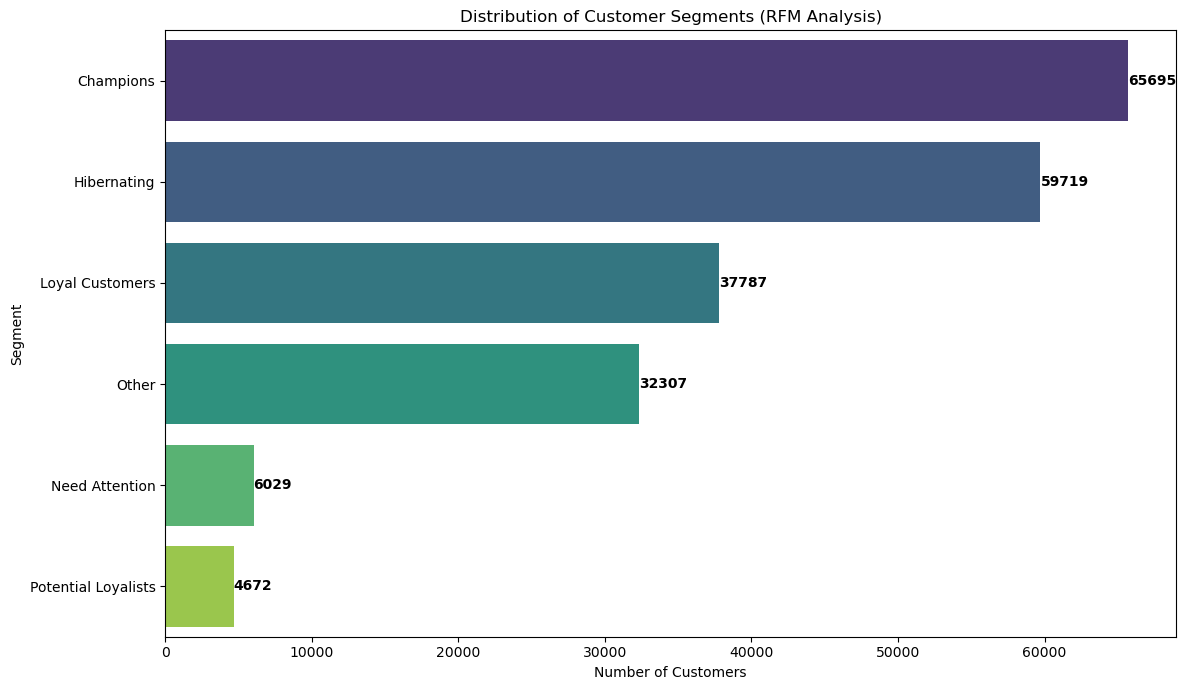

In [40]:
# Ensure R_score, F_score are integers and fill NaN in M_score with 1 (lowest score)
# 'M_score' can have NaN if a user's orders had no products associated in the prior dataset
rfm['M_score'] = rfm['M_score'].fillna(1).astype(int)
rfm['R_score'] = rfm['R_score'].astype(int)
rfm['F_score'] = rfm['F_score'].astype(int)

# Define RFM segments based on scores
def rfm_segment(row):
    R = row['R_score']
    F = row['F_score']
    M = row['M_score']

    if R >= 4 and F >= 4 and M >= 4:
        return 'Champions'
    elif R >= 3 and F >= 3 and M >= 3:
        return 'Loyal Customers'
    elif R >= 4 and F >= 2 and M >= 2:
        return 'Potential Loyalists'
    elif R == 5 and F <= 2 and M <= 2:
        return 'New Customers'
    elif R <= 2 and F >= 3 and M >= 3:
        return 'At Risk'
    elif R >= 3 and F <= 2 and M <= 2:
        return 'Need Attention'
    elif R <= 2 and F <= 2 and M <= 2:
        return 'Hibernating'
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# Count customers in each segment
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer_Count']

print("Customer Segments Distribution:")
print(segment_counts)

# Visualize the customer segments
plt.figure(figsize=(12, 7))
sns.barplot(x='Customer_Count', y='Segment', data=segment_counts.sort_values('Customer_Count', ascending=False), palette='viridis')
plt.title('Distribution of Customer Segments (RFM Analysis)')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')

# Add count labels on bars
for p in plt.gca().patches:
    width = p.get_width()
    plt.gca().annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2),
                       ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

4.11: from RFM Segmentation:

Based on the RFM (Recency, Frequency, Monetary) scores, we can categorize customers into distinct segments, each requiring a tailored business strategy:

*   **Champions (R>=4, F>=4, M>=4)**:
    *   **Description**: These are your best customers. They bought recently, buy often, and spend the most. They are highly engaged and valuable.
    *   **Business Action**: Reward them, introduce them to new products, gather feedback to understand their preferences, and encourage advocacy.

*   **Loyal Customers (R>=3, F>=3, M>=3)**:
    *   **Description**: These customers are frequent and good spenders, and relatively recent. They form the backbone of your customer base.
    *   **Business Action**: Offer loyalty programs, exclusive access to sales or products, and personalized recommendations to maintain their engagement.

*   **Potential Loyalists (R>=4, F>=2, M>=2)**:
    *   **Description**: These are recent customers with moderate frequency and monetary value. They have the potential to become loyal customers.
    *   **Business Action**: Provide incentives for their next purchase, engage them with relevant content, and offer small discounts to encourage higher frequency.

*   **New Customers (R=5, F<=2, M<=2)**:
    *   **Description**: Very recent purchasers with low frequency and monetary value. They are still exploring your offerings.
    *   **Business Action**: Focus on excellent onboarding experience, welcome offers, and educational content to guide their first few purchases and encourage repeat business.

*   **At Risk (R<=2, F>=3, M>=3)**:
    *   **Description**: These customers used to be good (high frequency and monetary), but haven't purchased recently. There's a risk of losing them.
    *   **Business Action**: Implement win-back campaigns, offer personalized re-engagement discounts, or remind them of their favorite products. Understand the reasons for their inactivity.

*   **Need Attention (R>=3, F<=2, M<=2)**:
    *   **Description**: These customers are relatively recent, but have low frequency and monetary value. They might be one-time buyers or occasional purchasers.
    *   **Business Action**: Engage them with targeted promotions for products they might like, or highlight benefits they might be missing. Try to increase their purchase frequency.

*   **Hibernating (R<=2, F<=2, M<=2)**:
    *   **Description**: Customers with low recency, frequency, and monetary scores. They haven't engaged much recently or in the past.
    *   **Business Action**: Re-engagement campaigns with significant offers. If no response, consider them as 'lost' for targeted marketing efforts to optimize budget.

*   **Other**: This category captures combinations not specifically defined above. Further analysis can break down this segment if it's significant.

By understanding these segments, businesses can develop more effective marketing strategies, allocate resources efficiently, and improve customer lifetime value.

# 5. Conclusion & Insights

### Core Sales Metrics:
*   **Top Products & Aisles**: Bananas are overwhelmingly the most frequently purchased product and are also the most common first item added to the cart. Correspondingly, the "fresh fruits" aisle and the "produce" department exhibit the highest product demand and generate the most orders. This highlights the dominance of fresh produce in customer shopping habits.
*   **Top Department-Aisle Combinations**: The leading combinations are "produce - fresh fruits," "produce - fresh vegetables," and "produce - packaged vegetables fruits," further reinforcing the strong demand for fresh and healthy food items.
*   **Products Added Later**: Orange Liqueur has the highest average cart position, suggesting it's typically added later in the shopping process.

### Customer Behavior:
*   **Reorder Patterns**: Purified water, whole milk, and omega 3 milk have the highest reorder rates, indicating strong customer loyalty and consistent demand for these staple items.
*   **Ordering Time**: The majority of orders (approximately 90%) are placed between 8 AM and 8 PM, suggesting peak shopping hours for targeted promotions and delivery scheduling.
*   **Ordering Day**: Sunday and Monday are the busiest shopping days, indicating that customers tend to stock up at the beginning of the week or after the weekend.
*   **Order Frequency**: The average time between customer orders is 15.45 days, providing a benchmark for predicting customer next-purchase behavior and engagement strategies.

### RFM Scores:
The RFM (Recency, Frequency, Monetary) analysis segmented customers into actionable groups:
*   **Champions**: These are the most valuable customers, buying recently, frequently, and spending the most. They should be rewarded and leveraged for advocacy.
*   **Loyal Customers**: Frequent and good spenders who are relatively recent. Loyalty programs and personalized recommendations are key for this segment.
*   **Potential Loyalists**: Recent customers with moderate frequency and monetary value, showing potential for increased loyalty through incentives.
*   **New Customers**: Very recent buyers with low frequency and monetary value. Onboarding experience and welcome offers are crucial to nurture them.
*   **At Risk**: Customers who used to be good but haven't purchased recently. Win-back campaigns and re-engagement discounts are recommended.
*   **Need Attention**: Recent customers with low frequency and monetary value. Targeted promotions can help increase their engagement.
*   **Hibernating**: Customers with low scores across all RFM metrics. Re-engagement campaigns with significant offers are needed, or they might be deprioritized for marketing.

### Inventory and Profitability Metrics:
*   **Inventory Optimization**: Given the high demand for bananas and fresh produce, ensuring consistent availability and efficient supply chain management for these items is critical. Focusing on high-demand categories while evaluating the profitability of non-performing ones can improve the bottom line.
*   **Targeted Marketing**: Insights on reorder rates, order times, and days can optimize marketing campaigns. For instance, promoting water and milk with subscription options, or sending promotions for fresh produce during peak shopping days/hours.
*   **Basket Analysis**: Understanding which items are first added to the cart (like bananas) and which are added later (like Orange Liqueur) can inform product placement, recommendation engines, and promotional bundling strategies.